In [20]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('../resources/CPI_MONTHLY.csv')
relevant_data = data[['date', 'STATIC_TOTALCPICHANGE']]
relevant_data


,date,STATIC_TOTALCPICHANGE
0,95-01-01,0.6
1,95-02-01,1.9
2,95-03-01,2.1
3,95-04-01,2.5
4,95-05-01,2.9
5,95-06-01,2.7
6,95-07-01,2.6
7,95-08-01,2.2
8,95-09-01,2.2
9,95-10-01,2.3


In [51]:
#excludes 2018 CPI change data
annual_average_cpi_change = []
dates = []
for i in range(0, len(data)-10, 12):
    annual_average_cpi_change.append(relevant_data.iloc[i:i+12]['STATIC_TOTALCPICHANGE'].mean())
    dates.append(relevant_data.iloc[i]['date'].split('-')[0])
    

In [54]:
column_names = ['dates', 'CPI Change']
cpi_df = pd.DataFrame(dict(zip(column_names, [dates, annual_average_cpi_change])))

In [55]:
cpi_df.to_csv('../input/annual_cpi_canada.csv', index=False)

[Text(0,0.5,'Change In CPI (%)'),
 Text(0.5,0,'Year'),
 Text(0.5,1,'Annual Average CPI Change in Canada')]

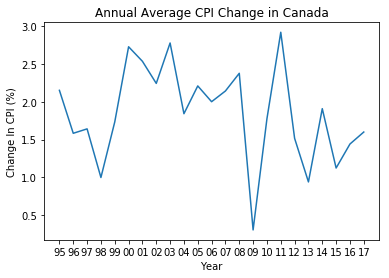

In [57]:
fig, axes = plt.subplots()
axes.plot(cpi_df['dates'], cpi_df['CPI Change'])
axes.set(title='Annual Average CPI Change in Canada', xlabel='Year', ylabel='Change In CPI (%)')